# Baseball: Homerun Analysis

## Table of Contents

> #### 1. [Project Understanding](#project-understanding)
> #### 2. [Data Understanding](#Data-Understanding)
> #### 3. [Data Preparation](#Data-Preparation)
> #### 4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
> #### 5. [Conclusions](#Conclusions)

## 1. <a name ="project-understanding"></a> Project Understanding

### Background: 

During my childhood, I developed a deep passion for baseball with a dream to play in college and hopefully one day in the MLB. I enthusiastically followed the sport, and played competitively on various travel teams. However, my height became a hindrance to my playing aspirations. Standing out to prominent college coaches proved challenging due to my stature, as Division 1 baseball coaches typically prioritize players with perceived potential for power and speed, often initially assessing height and weight. In baseball, hitting for power is a key performance metric, with the hit that displays the most power being a home run.   

This was discouraging, because I knew I could compete with the same players that were taller, so this led me to ask the question: “Does height help predict performance in baseball?”.  

### Project goals: 

Through this project, I work to answer the question: “Does height help predict performance in baseball?”, as well as explore other factors that may contribute to a player's power potential. 

In other words, the goal of this project is to use data analysis to determine if there is a correlation between a player's height and their hitting power.


### Project success criteria: 

The success of this project will be measured by using Pearson's correlation coefficient to determine the relationship between hitting power and physical metrics such as height and weight. 

## 2. <a name ="Data-Understanding"></a> Data Understanding

The Lahman database collects data on Major League Baseball statistics. Two datasets will be used for this analysis. 

One dataset being 'Batting' which has season batting statistics for players. This dataset has 110,495 entries and 22 features. Each entry in the 'Batting' dataset represents the season batting statistics for a specific season of a player's career. Each player is is represented using their unique ID (`playerID`). Players that played multipled seasons will appear more than once, as each row represents a season for a specific player. Additional  information is included about each player's batting stats, such as their number of at bats, hits, strike outs, homeruns, etc.

The second dataset used in this analysis is 'People'. This dataset includes 20,370 entries and 24 features. Each entry in the 'People' dataset represents an player who played in the MLB. For each player there is a unique ID associated with the specific player (`playerID`). Additional demographic information is included about each player, such as their name, height, weight, birthday, birth state, etc.

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the csv files that will be used for analysis
batting = pd.read_csv('/Users/chriskucewicz/Documents/DataSciencefiles/Sabermetrics/baseballdatabank-2022.2/core/Batting.csv')
people = pd.read_csv('/Users/chriskucewicz/Documents/DataSciencefiles/Sabermetrics/baseballdatabank-2022.2/core/People.csv')

In [4]:
# provides a preview of the dataset by displaying the first five rows
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [15]:
# provides the number of rows and columns of the 'batting' dataset
batting.shape

(110495, 22)

In [7]:
#provides the structure of the 'batting' dataset as well as the datatype for each feature
batting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110495 entries, 0 to 110494
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   playerID  110495 non-null  object 
 1   yearID    110495 non-null  int64  
 2   stint     110495 non-null  int64  
 3   teamID    110495 non-null  object 
 4   lgID      109758 non-null  object 
 5   G         110495 non-null  int64  
 6   AB        110495 non-null  int64  
 7   R         110495 non-null  int64  
 8   H         110495 non-null  int64  
 9   2B        110495 non-null  int64  
 10  3B        110495 non-null  int64  
 11  HR        110495 non-null  int64  
 12  RBI       109739 non-null  float64
 13  SB        108127 non-null  float64
 14  CS        86954 non-null   float64
 15  BB        110495 non-null  int64  
 16  SO        108395 non-null  float64
 17  IBB       73845 non-null   float64
 18  HBP       107679 non-null  float64
 19  SH        104427 non-null  float64
 20  SF  

In [8]:
# provides the summary statistics for the quantitative features of the 'batting' dataset
batting.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,110495.000000,109739.000000,108127.000000,86954.000000,110495.000000,108395.000000,73845.000000,107679.000000,104427.000000,74392.00000,85054.000000
mean,1968.051948,1.079624,50.605258,138.557084,18.397312,36.184117,6.177429,1.233893,2.859939,16.720664,2.893190,1.162431,12.787556,20.625038,1.040368,1.060810,2.168529,1.01480,2.874586
std,39.992877,0.288199,46.831714,183.317500,27.990668,52.066687,9.613576,2.580559,6.386896,26.187532,7.564655,2.662906,20.555314,28.724308,2.688349,2.299942,4.129955,1.92328,4.658673
min,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1938.000000,1.000000,12.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,1977.000000,1.000000,34.000000,45.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,2.000000,9.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,2002.000000,1.000000,78.000000,222.000000,26.000000,55.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.00000,4.000000
max,2021.000000,5.000000,165.000000,716.000000,198.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.00000,36.000000


In [9]:
# provides a preview of the dataset by displaying the first five rows
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,2021.0,1.0,22.0,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [14]:
# provides the number of rows and columns of the 'people' dataset
people.shape

(20370, 24)

In [17]:
#provides the structure of the 'people' dataset as well as the datatype for each feature
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20370 entries, 0 to 20369
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   playerID      20370 non-null  object 
 1   birthYear     20259 non-null  float64
 2   birthMonth    20091 non-null  float64
 3   birthDay      19950 non-null  float64
 4   birthCountry  20311 non-null  object 
 5   birthState    19836 non-null  object 
 6   birthCity     20202 non-null  object 
 7   deathYear     10004 non-null  float64
 8   deathMonth    10003 non-null  float64
 9   deathDay      10002 non-null  float64
 10  deathCountry  9997 non-null   object 
 11  deathState    9944 non-null   object 
 12  deathCity     9991 non-null   object 
 13  nameFirst     20333 non-null  object 
 14  nameLast      20370 non-null  object 
 15  nameGiven     20333 non-null  object 
 16  weight        19554 non-null  float64
 17  height        19634 non-null  float64
 18  bats          19189 non-nu

In [16]:
# provides the summary statistics for the quantitative features of the 'people' dataset
people.describe()

,birthYear,birthMonth,birthDay,deathYear,deathMonth,deathDay,weight,height
count,20259.000000,20091.000000,19950.000000,10004.000000,10003.000000,10002.000000,19554.000000,19634.000000
mean,1935.220396,6.630481,15.617243,1967.059976,6.480456,15.522296,187.961594,72.357594
std,43.008946,3.464092,8.762114,33.353873,3.537484,8.790894,22.429934,2.616806
min,1820.000000,1.000000,1.000000,1872.000000,1.000000,1.000000,65.000000,43.000000
25%,1897.000000,4.000000,8.000000,1944.000000,3.000000,8.000000,172.000000,71.000000
50%,1943.000000,7.000000,16.000000,1969.000000,6.000000,15.000000,185.000000,72.000000
75%,1974.000000,10.000000,23.000000,1994.000000,10.000000,23.000000,200.000000,74.000000
max,2001.000000,12.000000,31.000000,2022.000000,12.000000,31.000000,320.000000,83.000000


## 3. <a name ="Data-Preparation"></a> Data Preparation

The following are keys steps I took to prepare the data for analysis:
* Compile the career statistics for each player from the `batting` dataframe into a new dataframe called `career_hrs`
* Create a new dataframe that only includes the career at bats and homeruns for each player called `career_hrs_abs`
* Create a new dataframe from the `people` dataframe that only includes each players' unique ID (`playerID`), their weight, and their height called `height_weight`
* Use panda's `.merge` function for merge the dataframes `career_hrs_abs` and `height_weight` into a single dataframe called `ab_hr_height_weight`
* Filter the merged dataframe to only include players who have more than 5000 career at bats. The purpose of this is to ensure that the analysis consists of players who played regularly, as opposed to bench players or players who only had a short stint in MLB. 


(Players who had a short career will not have career homerun total that will be useful for analysis as their sample size is too small. I decided on the threshold of 5000 at-bats because a regular everyday player will compile between about 550-650 at-bats per season. 5000 at-bats thus corresponds to between 8-9 full seasons. This ensures that players' statistics used for analysis represent the statistics of players who had more than a short career.)

In [5]:
# Compiling the career home run totals for each player
career_hrs = batting.groupby('playerID').sum()

In [6]:
# Creating a new dataframe with only one feature: Home runs
career_hrs = career_hrs['HR']
career_hrs.head()

playerID
aardsda01      0
aaronha01    755
aaronto01     13
aasedo01       0
abadan01       0
Name: HR, dtype: int64

In [7]:
career_hrs.describe()

count    20166.000000
mean        15.670386
std         50.678126
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max        762.000000
Name: HR, dtype: float64

In [8]:
# Compiling the career at bat totals for each player
career_AB = batting.groupby('playerID').sum()

In [9]:
# Creating a dataframe for the career at bats of each player
career_AB = career_AB['AB']
career_AB.head()

playerID
aardsda01        4
aaronha01    12364
aaronto01      944
aasedo01         5
abadan01        21
Name: AB, dtype: int64

In [10]:
# Merging career_hrs dataframe with career_AB dataframe on 'playerID'
career_hrs_abs = pd.concat([career_AB, career_hrs], axis = 1)
career_hrs_abs.head()

,AB,HR
playerID,,
aardsda01,4,0
aaronha01,12364,755
aaronto01,944,13
aasedo01,5,0
abadan01,21,0


In [11]:
# Creating a new dataframe with playerID and the player's corresponding height and weight
height_weight = people[['playerID', 'height', 'weight']]
height_weight

,playerID,height,weight
0,aardsda01,75.0,215.0
1,aaronha01,72.0,180.0
2,aaronto01,75.0,190.0
3,aasedo01,75.0,190.0
4,abadan01,73.0,184.0
...,...,...,...
20365,zupofr01,71.0,182.0
20366,zuvelpa01,72.0,173.0
20367,zuverge01,76.0,195.0
20368,zwilldu01,66.0,160.0


In [12]:
# Creating a dataframe that includes career at bats, career home runs, and height
ab_hr_height_weight = pd.merge(career_hrs_abs, height_weight, on = 'playerID')

In [13]:
# Creating a dataframe that only includes rows (players) who have 5000 or more at bats"
ab_5000 = ab_hr_height_weight[ab_hr_height_weight['AB'] >=5000]

In [14]:
ab_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 811 entries, 1 to 20150
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  811 non-null    object 
 1   AB        811 non-null    int64  
 2   HR        811 non-null    int64  
 3   height    811 non-null    float64
 4   weight    811 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 38.0+ KB


## 3. <a name ="Exploratory-Data-Analysis"></a> Exploratory Data Analysis

Three key findings from the analysis below: 

* Weight and height are nearly identically correlated with career home runs
    * The correlation coefficient value  between height and homeruns (r = 0.527) shows a moderate, positive relationship, and the correlation coefficient value between weight and homeruns (r = 0.530) also shows a moderate, positive relationship.  
    * In addition to using career homeruns to measure a player's batting power, I used home run rate, which is a rate that measures the number of home runs per at bat for each player. This measure showed a moderate, positive correlation with both player height and weight as well.

From this analysis, one would expect taller players and heavier players to hit more home runs over their entire career. This makes sense when simply considering Newton's Second Law of Physics (Force = Mass x Acceleration). Heavier players, who are usually taller as well, (height and weight had a correlation coefficient of 0.658) have more mass which allows them to apply more force when they connect with the ball causing the ball to travel farther.

In [24]:
# Producing summary statistics for each quantitative variable
ab_5000.describe()

,AB,HR,height,weight,HR per AB
count,811.000000,811.000000,811.000000,811.000000,811.000000
mean,6765.807645,180.491985,71.903822,186.231813,0.026143
std,1470.245480,138.959781,2.409472,22.686114,0.017952
min,5005.000000,2.000000,64.000000,125.000000,0.000400
25%,5576.500000,68.000000,70.000000,170.000000,0.010076
50%,6440.000000,150.000000,72.000000,183.000000,0.023213
75%,7566.500000,260.000000,74.000000,200.000000,0.039865
max,14053.000000,762.000000,79.000000,285.000000,0.094230


The above table provides summary statistics for each quantitative feature of the dataframe. A particular point that stands out from this table is the different between the mean and median homerun totals, 180.491 and 150 respectively. Since the mean is substantially higher than the median, this indicates that there may be some outliers in the data that result in a higher mean. 

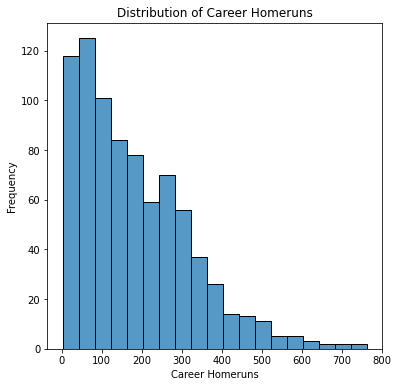

In [15]:
# Examining the distribution of career homeruns
fig, ax = plt.subplots(figsize = (6,6))

sns.histplot(data = ab_5000, x = 'HR')
ax.set_title('Distribution of Career Homeruns')
ax.set_ylabel('Frequency')
ax.set_xlabel('Career Homeruns');

From this histogram, one can see that the distribution of career homeruns is skewed right. While there are quite a few players who have hit more than 400 career home runs, the majority of players with at least 5000 career at bats have hit less than 400 home runs in their career. This observation is verified by the summary statistics above. The mean for career homeruns (180.49) is higher than the median (150) career homeruns which indicates that the distribution is skewed right. 

In [16]:
# Examining the Pearson correlation coefficients of the variables
ab_5000.corr(method = 'pearson')

,AB,HR,height,weight
AB,1.000000,0.414371,0.031886,0.012035
HR,0.414371,1.000000,0.526981,0.530347
height,0.031886,0.526981,1.000000,0.658239
weight,0.012035,0.530347,0.658239,1.000000


From this calculation, one can notice that weight and height are nearly identically correlated with home runs. The correlation coefficient of 0.527, means there is a moderately positive correlation between height and home runs, and a correlation coefficient of 0.530 means there is a moderately positive correlation between weight and home runs. 

In [17]:
plt.style.use('default')

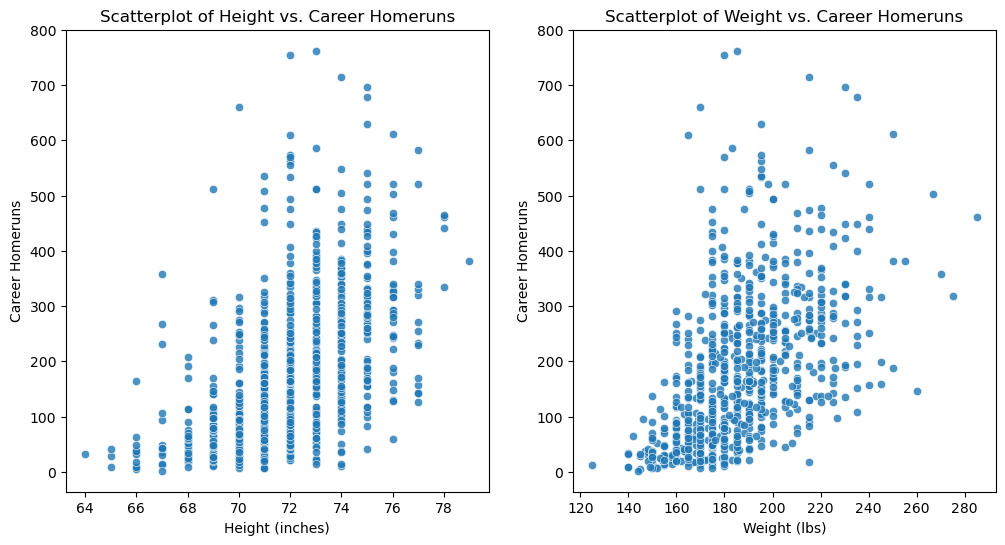

In [18]:
# Creating scatterplots for the relationship between height and homeruns and weight and homeruns
fig, axes = plt.subplots(1,2, figsize = (12,6))

sns.scatterplot(data = ab_5000, x = 'height', y = 'HR', alpha = 0.8, ax = axes[0])
axes[0].set_title('Scatterplot of Height vs. Career Homeruns')
axes[0].set_xlabel('Height (inches)')
axes[0].set_ylabel('Career Homeruns')

sns.scatterplot(data = ab_5000, x = 'weight', y = 'HR', alpha = 0.8, ax = axes[1])
axes[1].set_title('Scatterplot of Weight vs. Career Homeruns')
axes[1].set_xlabel('Weight (lbs)')
axes[1].set_ylabel('Career Homeruns');

The scatterplots of 'Height vs. Homeruns' and 'Weight vs. Homeruns' confirm the values of the correlation coefficients from earlier. Both height and weight have moderately, positive correlations with career homeruns. The data for height appears in columns, indicating that heights 

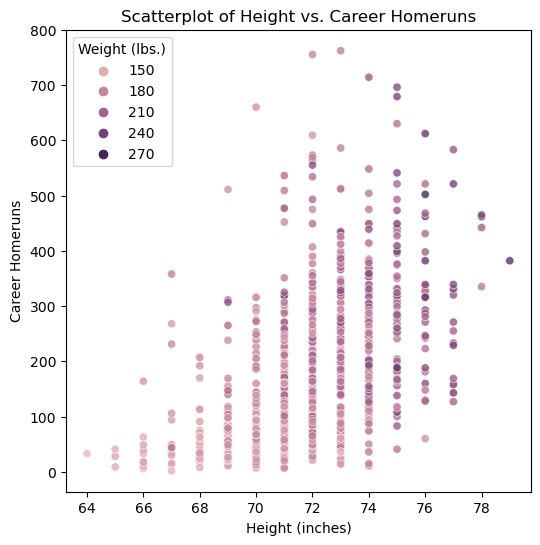

In [19]:
# Creating a scatterplot for the relationships between height, homeruns, and weight
fig, ax = plt.subplots(figsize = (6,6))

sns.scatterplot(data = ab_5000, x = 'height', y = 'HR', alpha = 0.8, hue = 'weight')
ax.set_title('Scatterplot of Height vs. Career Homeruns')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Career Homeruns')
plt.legend(loc = 'upper left', title = 'Weight (lbs.)');

The above scatterplot charts the relationship between a player's height (inches) with their career homerun total. Each point on the graph is shaded to represent their corresponding weight. The scatterplot shows that as a player's height increases we would expect them to weight more and have more career homeruns. 

In [20]:
ab_5000.head()

,playerID,AB,HR,height,weight
1,aaronha01,12364,755,72.0,180.0
35,abreubo01,8480,288,72.0,220.0
98,adamssp01,5557,9,65.0,151.0
103,adcocjo01,6606,336,76.0,210.0
205,alfoned01,5385,146,71.0,210.0


In [21]:
# Adding a home run rate column to the existing dataframe 
ab_5000['HR per AB'] = ab_5000['HR']/ab_5000['AB']
ab_5000.head()

<ipython-input-21-4cfcd1f21244>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_5000['HR per AB'] = ab_5000['HR']/ab_5000['AB']


,playerID,AB,HR,height,weight,HR per AB
1,aaronha01,12364,755,72.0,180.0,0.061064
35,abreubo01,8480,288,72.0,220.0,0.033962
98,adamssp01,5557,9,65.0,151.0,0.001620
103,adcocjo01,6606,336,76.0,210.0,0.050863
205,alfoned01,5385,146,71.0,210.0,0.027112


In [22]:
# Investigating the Pearson coefficient with new variable included
ab_5000.corr(method = 'pearson')

,AB,HR,height,weight,HR per AB
AB,1.000000,0.414371,0.031886,0.012035,0.137098
HR,0.414371,1.000000,0.526981,0.530347,0.937201
height,0.031886,0.526981,1.000000,0.658239,0.591396
weight,0.012035,0.530347,0.658239,1.000000,0.606824
HR per AB,0.137098,0.937201,0.591396,0.606824,1.000000


Even using HR per AB as different statistic to measure a player's power, there is still a moderate, positive correlation between HR per AB and height (r = 0.591), as well as HR per AB and weight (r = 0.607).

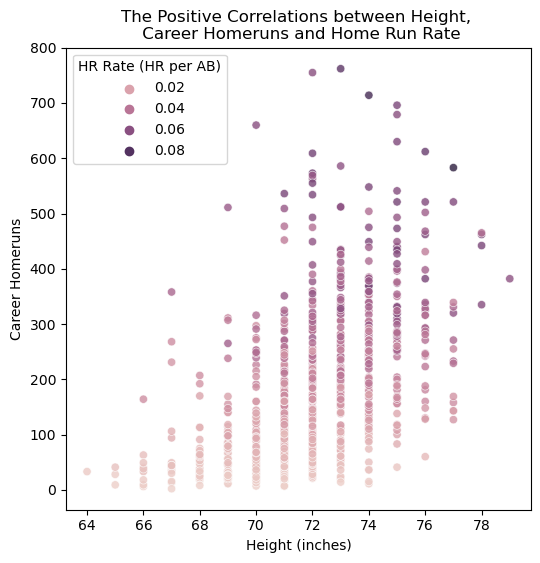

In [23]:
# Plotting career homeruns against height with hue to indicate HR rate
fig, ax = plt.subplots(figsize = (6,6))

sns.scatterplot(data = ab_5000, x = 'height', y = 'HR', alpha = 0.8, hue = 'HR per AB')
ax.set_title('The Positive Correlations between Height, \n Career Homeruns and Home Run Rate')
ax.set_xlabel('Height (inches)')
ax.set_ylabel('Career Homeruns')
plt.legend(loc = 'upper left', title = 'HR Rate (HR per AB)');

The above scatterplot charts the relationship between a player's height (inches) with their career homerun total. Each point on the scatterplot is shaded to represent their corresponding Homerun Rate (HR Rate). The scatterplot shows that as a player's height increases we would expect them to have more career homeruns as well as a higher overall homerun rate. Including homerun rate is important because it shows that career homerun totals were not high simply due to larger amount of at-bats. Instead, taller players also had a high homerun rate meaning they were better homerun hitters, not simply players with a larger number of at-bats.

## 4. <a name ="Conclusions"></a> Conclusions

### <a name ="Limitations"></a> Limitations

This analysis uses metrics that are readily available for free online, such as height, weight, and number of extra base hits. Currently, most Major League Baseball (MLB) organizations have technology that provides advanced metrics (such as bat speed and launch angle) which help measure a player's power potential. This type of data is not as readily available to public users, so while my analysis provides factors that are related to a player's hitting power, MLB organizations may have data that indicates factors that are more strongly correlated with hitting power. In other words, the common readily available data that I used in this analysis may not provide as much insight into which factors are most strongly correlated with a player's hitting power as would data that MLB organizations use. 

### <a name ="Recommedations"></a> Recommedations

The implication for this analysis means that when scouts and coaches are deciding on which players to make up their team, height and weight are criteria that can be used to help evaluate the player’s ability to hit the ball hard and far. Although height and weight are factors when projecting a player’s power potential, there are other factors that should also be considered such as: bat speed, launch angel, overall strength, and how often a player’s swing makes solid contact with the pitch.

### <a name ="Next-Steps"></a> Next Steps

For future iterations of this project, I am interested in performing hypothesis tests to determine if the relationship between a player's height and number of career home runs is statistically significant. Additionally, I plan to explore more up-to-date features that are used to determine a players hitting power potential, such as average exit velocity and barrel percentage.